In [1]:
#libraries
#tensorflow version 1.15
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
print(tf.__version__)

c:\users\ayush\anaconda3\envs\tf1_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\ayush\anaconda3\envs\tf1_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\ayush\anaconda3\envs\tf1_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\ayush\anaconda3\envs\tf1_gpu\lib\site-packages\tensorflow\

1.14.0


In [2]:
#download Fashon MNIST
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -P data/fashion http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

    
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/fashion")   

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


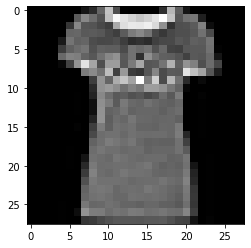

In [3]:
#Display a sample image
s = mnist.train.next_batch(1)[0]
s = s.reshape((28,28))
plt.imshow(s,cmap='gray')

In [4]:
#Define weights for discriminator and generator
def weights(in_dim,out_dim,name):
    initializer= tf.contrib.layers.xavier_initializer()
    W =tf.Variable(initializer((in_dim,out_dim)),name=name,dtype=tf.float32)
    b =tf.Variable(initializer([out_dim]),name=name,dtype=tf.float32)
    return W,b

W1,b1 = weights(100,128,"gen1")#[100,128] ,initially Generator input is 100x1 noise veector
W2,b2 = weights(128,128,"gen2")
W3,b3 = weights(128,784,"gen3")
#Generator
def generator(Z):
    dense1 =tf.nn.relu(tf.nn.bias_add(tf.matmul(Z,W1),b1))
    dense2 = tf.nn.relu(tf.nn.bias_add(tf.matmul(dense1,W2),b2))
    dense3 = tf.nn.tanh(tf.nn.bias_add(tf.matmul(dense2,W3),b3))
    return dense3

Wd1,bd1 = weights(784,128,"dis1")
Wd2,bd2 = weights(128,128,"dis2")
Wd3,bd3 = weights(128,1,"dis3")
#discriminator
def discriminator(X):
    dense1 = tf.nn.relu(tf.nn.bias_add(tf.matmul(X,Wd1),bd1))
    dense2 = tf.nn.relu(tf.nn.bias_add(tf.matmul(dense1,Wd2),bd2))
    dense3  = tf.nn.bias_add(tf.matmul(dense2,Wd3),bd3)
    return dense3

In [6]:
#placeholder for generator image and discriminator image
#placehodlers
X_input = tf.placeholder(tf.float32,[None,784])
Z_input = tf.placeholder(tf.float32,[None,100])

#generator input
gen_fake = generator(Z_input)

#defining the input for discriminator
dis_real=discriminator(X_input)
dis_fake = discriminator(gen_fake)

#defining the loss f()s
#discriminator Loss
d_lreal = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
                                                    logits = dis_real,labels=tf.ones_like(dis_real)))

d_lfake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = dis_fake
                                                                 ,labels = tf.zeros_like(dis_fake)))

dis_total_loss = d_lreal + d_lfake


#Generator loss
gen_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=dis_fake, 
                                                                labels=tf.ones_like(dis_fake)))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
dis_vars = [dis for dis in tf.trainable_variables() if 'dis' in dis.name]
gen_vars = [gen for gen in tf.trainable_variables() if 'gen' in gen.name]

#optimizer
discriminator_op = tf.train.AdamOptimizer(0.001).minimize(dis_total_loss,var_list=dis_vars)
generator_op = tf.train.AdamOptimizer(0.001).minimize(gen_fake_loss,var_list = gen_vars)

Epoch: 0 , Generator Loss: 8.961957931518555 , Discriminator Loss: 0.0006304363487288356
Epoch: 0 , Generator Loss: 8.961957931518555 , Discriminator Loss: 0.0006304363487288356


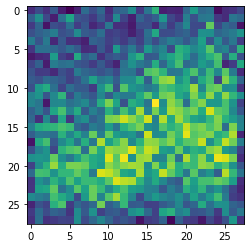

Epoch: 10 , Generator Loss: 4.33519172668457 , Discriminator Loss: 0.37011733651161194
Epoch: 20 , Generator Loss: 3.5604095458984375 , Discriminator Loss: 0.559506356716156
Epoch: 30 , Generator Loss: 2.484325647354126 , Discriminator Loss: 0.5092912912368774
Epoch: 40 , Generator Loss: 2.6834380626678467 , Discriminator Loss: 0.6000592112541199
Epoch: 50 , Generator Loss: 3.0928826332092285 , Discriminator Loss: 0.6838903427124023
Epoch: 50 , Generator Loss: 3.0928826332092285 , Discriminator Loss: 0.6838903427124023


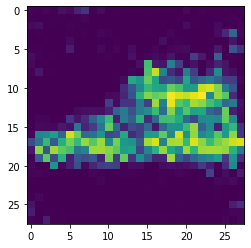

Epoch: 60 , Generator Loss: 2.348459005355835 , Discriminator Loss: 0.4905927777290344
Epoch: 70 , Generator Loss: 1.8586981296539307 , Discriminator Loss: 0.8391640186309814
Epoch: 80 , Generator Loss: 1.8127081394195557 , Discriminator Loss: 0.7925596237182617
Epoch: 90 , Generator Loss: 1.5642284154891968 , Discriminator Loss: 1.0286328792572021
Epoch: 100 , Generator Loss: 1.554397702217102 , Discriminator Loss: 1.008927822113037
Epoch: 100 , Generator Loss: 1.554397702217102 , Discriminator Loss: 1.008927822113037


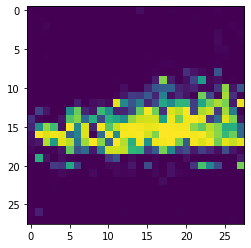

Epoch: 110 , Generator Loss: 1.2203783988952637 , Discriminator Loss: 1.1498160362243652
Epoch: 120 , Generator Loss: 1.5616182088851929 , Discriminator Loss: 1.0990084409713745
Epoch: 130 , Generator Loss: 1.521736741065979 , Discriminator Loss: 1.0376662015914917
Epoch: 140 , Generator Loss: 1.9061617851257324 , Discriminator Loss: 1.1529426574707031
Epoch: 150 , Generator Loss: 1.1467293500900269 , Discriminator Loss: 1.1262800693511963
Epoch: 150 , Generator Loss: 1.1467293500900269 , Discriminator Loss: 1.1262800693511963


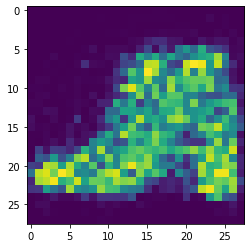

Epoch: 160 , Generator Loss: 1.3194355964660645 , Discriminator Loss: 1.0329216718673706
Epoch: 170 , Generator Loss: 1.386042833328247 , Discriminator Loss: 1.1933667659759521
Epoch: 180 , Generator Loss: 1.240891933441162 , Discriminator Loss: 1.5185201168060303
Epoch: 190 , Generator Loss: 1.063435673713684 , Discriminator Loss: 1.4856038093566895
Epoch: 200 , Generator Loss: 1.355159044265747 , Discriminator Loss: 1.1279927492141724
Epoch: 200 , Generator Loss: 1.355159044265747 , Discriminator Loss: 1.1279927492141724


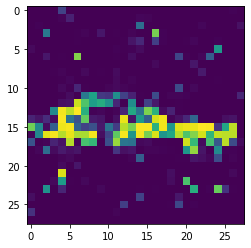

Epoch: 210 , Generator Loss: 1.4344580173492432 , Discriminator Loss: 1.061895728111267
Epoch: 220 , Generator Loss: 1.2797354459762573 , Discriminator Loss: 1.26139497756958
Epoch: 230 , Generator Loss: 1.4297995567321777 , Discriminator Loss: 0.918540358543396
Epoch: 240 , Generator Loss: 1.229923963546753 , Discriminator Loss: 1.0393545627593994
Epoch: 250 , Generator Loss: 1.2605068683624268 , Discriminator Loss: 1.0963006019592285
Epoch: 250 , Generator Loss: 1.2605068683624268 , Discriminator Loss: 1.0963006019592285


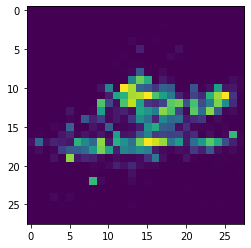

Epoch: 260 , Generator Loss: 1.0947566032409668 , Discriminator Loss: 1.2808986902236938
Epoch: 270 , Generator Loss: 1.161167860031128 , Discriminator Loss: 1.0769000053405762
Epoch: 280 , Generator Loss: 1.1522457599639893 , Discriminator Loss: 1.1093941926956177
Epoch: 290 , Generator Loss: 1.0698249340057373 , Discriminator Loss: 1.0588408708572388
Epoch: 300 , Generator Loss: 1.3034287691116333 , Discriminator Loss: 1.064916968345642
Epoch: 300 , Generator Loss: 1.3034287691116333 , Discriminator Loss: 1.064916968345642


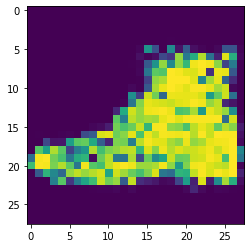

Epoch: 310 , Generator Loss: 0.9907788634300232 , Discriminator Loss: 1.159813404083252
Epoch: 320 , Generator Loss: 1.0254905223846436 , Discriminator Loss: 1.0564004182815552
Epoch: 330 , Generator Loss: 0.9902387261390686 , Discriminator Loss: 1.149867296218872
Epoch: 340 , Generator Loss: 1.015366792678833 , Discriminator Loss: 1.163955807685852
Epoch: 350 , Generator Loss: 0.995606005191803 , Discriminator Loss: 1.163575530052185
Epoch: 350 , Generator Loss: 0.995606005191803 , Discriminator Loss: 1.163575530052185


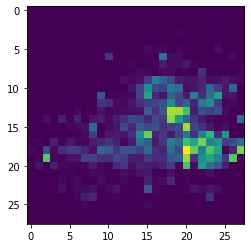

Epoch: 360 , Generator Loss: 0.9836909770965576 , Discriminator Loss: 1.2400614023208618
Epoch: 370 , Generator Loss: 1.157289981842041 , Discriminator Loss: 1.0586202144622803
Epoch: 380 , Generator Loss: 0.9884638786315918 , Discriminator Loss: 1.1641480922698975
Epoch: 390 , Generator Loss: 1.0365746021270752 , Discriminator Loss: 1.1912620067596436
Epoch: 400 , Generator Loss: 0.9503018856048584 , Discriminator Loss: 1.1697728633880615
Epoch: 400 , Generator Loss: 0.9503018856048584 , Discriminator Loss: 1.1697728633880615


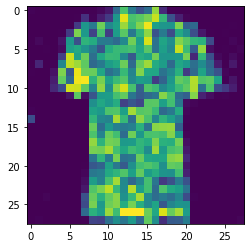

Epoch: 410 , Generator Loss: 0.9921505451202393 , Discriminator Loss: 1.1820333003997803
Epoch: 420 , Generator Loss: 0.9365290999412537 , Discriminator Loss: 1.2581052780151367
Epoch: 430 , Generator Loss: 0.992622435092926 , Discriminator Loss: 1.1978332996368408
Epoch: 440 , Generator Loss: 0.929659903049469 , Discriminator Loss: 1.3571271896362305
Epoch: 450 , Generator Loss: 0.9375428557395935 , Discriminator Loss: 1.253037929534912
Epoch: 450 , Generator Loss: 0.9375428557395935 , Discriminator Loss: 1.253037929534912


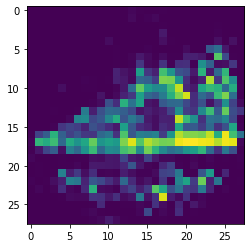

Epoch: 460 , Generator Loss: 0.8999302387237549 , Discriminator Loss: 1.3159029483795166
Epoch: 470 , Generator Loss: 0.9596971273422241 , Discriminator Loss: 1.196561574935913
Epoch: 480 , Generator Loss: 0.9008067846298218 , Discriminator Loss: 1.2361843585968018
Epoch: 490 , Generator Loss: 0.9037723541259766 , Discriminator Loss: 1.2440376281738281
Epoch: 500 , Generator Loss: 0.9744641780853271 , Discriminator Loss: 1.1827421188354492
Epoch: 500 , Generator Loss: 0.9744641780853271 , Discriminator Loss: 1.1827421188354492


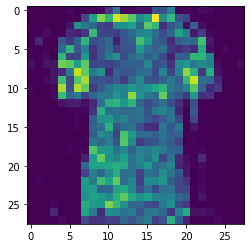

Epoch: 510 , Generator Loss: 0.9651030898094177 , Discriminator Loss: 1.1721415519714355
Epoch: 520 , Generator Loss: 0.9509625434875488 , Discriminator Loss: 1.1785571575164795
Epoch: 530 , Generator Loss: 0.9569408893585205 , Discriminator Loss: 1.1861271858215332
Epoch: 540 , Generator Loss: 0.9313443899154663 , Discriminator Loss: 1.158031940460205
Epoch: 550 , Generator Loss: 0.8654646277427673 , Discriminator Loss: 1.2586208581924438
Epoch: 550 , Generator Loss: 0.8654646277427673 , Discriminator Loss: 1.2586208581924438


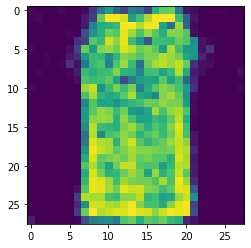

Epoch: 560 , Generator Loss: 0.8670697212219238 , Discriminator Loss: 1.185593605041504
Epoch: 570 , Generator Loss: 0.8930997252464294 , Discriminator Loss: 1.215592861175537
Epoch: 580 , Generator Loss: 0.8177294135093689 , Discriminator Loss: 1.3217906951904297
Epoch: 590 , Generator Loss: 0.8328699469566345 , Discriminator Loss: 1.2621411085128784
Epoch: 600 , Generator Loss: 0.7818644642829895 , Discriminator Loss: 1.2759733200073242
Epoch: 600 , Generator Loss: 0.7818644642829895 , Discriminator Loss: 1.2759733200073242


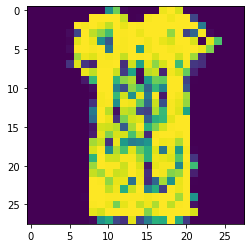

Epoch: 610 , Generator Loss: 0.8240225911140442 , Discriminator Loss: 1.3674203157424927
Epoch: 620 , Generator Loss: 0.8333620429039001 , Discriminator Loss: 1.2205755710601807
Epoch: 630 , Generator Loss: 0.8129563331604004 , Discriminator Loss: 1.3287098407745361
Epoch: 640 , Generator Loss: 0.8092898726463318 , Discriminator Loss: 1.3488645553588867
Epoch: 650 , Generator Loss: 0.7588124871253967 , Discriminator Loss: 1.3013036251068115
Epoch: 650 , Generator Loss: 0.7588124871253967 , Discriminator Loss: 1.3013036251068115


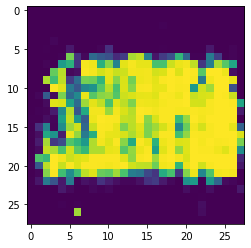

Epoch: 660 , Generator Loss: 0.7446026802062988 , Discriminator Loss: 1.327054500579834
Epoch: 670 , Generator Loss: 0.7262494564056396 , Discriminator Loss: 1.3808255195617676
Epoch: 680 , Generator Loss: 0.8362282514572144 , Discriminator Loss: 1.2226521968841553
Epoch: 690 , Generator Loss: 0.7178410291671753 , Discriminator Loss: 1.3548810482025146
Epoch: 700 , Generator Loss: 0.6987446546554565 , Discriminator Loss: 1.3888596296310425
Epoch: 700 , Generator Loss: 0.6987446546554565 , Discriminator Loss: 1.3888596296310425


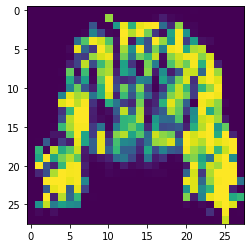

Epoch: 710 , Generator Loss: 0.7076396942138672 , Discriminator Loss: 1.3775795698165894
Epoch: 720 , Generator Loss: 0.6898912191390991 , Discriminator Loss: 1.3875170946121216
Epoch: 730 , Generator Loss: 0.7027794122695923 , Discriminator Loss: 1.372734546661377
Epoch: 740 , Generator Loss: 0.6862955689430237 , Discriminator Loss: 1.4367475509643555
Epoch: 750 , Generator Loss: 0.6864188313484192 , Discriminator Loss: 1.3275606632232666
Epoch: 750 , Generator Loss: 0.6864188313484192 , Discriminator Loss: 1.3275606632232666


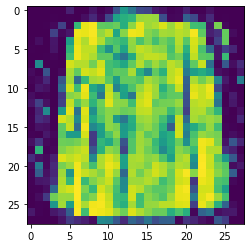

Epoch: 760 , Generator Loss: 0.6907196640968323 , Discriminator Loss: 1.3847410678863525
Epoch: 770 , Generator Loss: 0.7014868259429932 , Discriminator Loss: 1.3741211891174316
Epoch: 780 , Generator Loss: 0.6985598206520081 , Discriminator Loss: 1.376226544380188
Epoch: 790 , Generator Loss: 0.6953386068344116 , Discriminator Loss: 1.3825843334197998
Epoch: 800 , Generator Loss: 0.7012088298797607 , Discriminator Loss: 1.3749487400054932
Epoch: 800 , Generator Loss: 0.7012088298797607 , Discriminator Loss: 1.3749487400054932


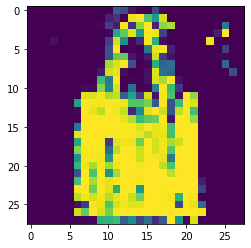

Epoch: 810 , Generator Loss: 0.6915971636772156 , Discriminator Loss: 1.3816674947738647
Epoch: 820 , Generator Loss: 0.6971925497055054 , Discriminator Loss: 1.3798574209213257
Epoch: 830 , Generator Loss: 0.6878656148910522 , Discriminator Loss: 1.3888238668441772
Epoch: 840 , Generator Loss: 0.694532036781311 , Discriminator Loss: 1.3786778450012207
Epoch: 850 , Generator Loss: 0.6952725052833557 , Discriminator Loss: 1.3859484195709229
Epoch: 850 , Generator Loss: 0.6952725052833557 , Discriminator Loss: 1.3859484195709229


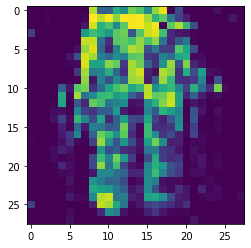

Epoch: 860 , Generator Loss: 0.6874577403068542 , Discriminator Loss: 1.406970500946045
Epoch: 870 , Generator Loss: 0.712367832660675 , Discriminator Loss: 1.3791441917419434
Epoch: 880 , Generator Loss: 0.764788806438446 , Discriminator Loss: 1.266559362411499
Epoch: 890 , Generator Loss: 0.7689699530601501 , Discriminator Loss: 1.3917593955993652
Epoch: 900 , Generator Loss: 0.7984790802001953 , Discriminator Loss: 1.2342772483825684
Epoch: 900 , Generator Loss: 0.7984790802001953 , Discriminator Loss: 1.2342772483825684


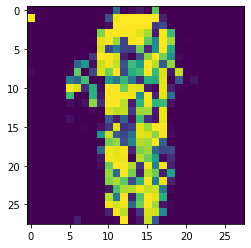

Epoch: 910 , Generator Loss: 0.6930091977119446 , Discriminator Loss: 1.386054277420044
Epoch: 920 , Generator Loss: 0.9014366269111633 , Discriminator Loss: 1.229175090789795
Epoch: 930 , Generator Loss: 0.7086729407310486 , Discriminator Loss: 1.3863186836242676
Epoch: 940 , Generator Loss: 0.6947490572929382 , Discriminator Loss: 1.3851286172866821
Epoch: 950 , Generator Loss: 0.6939175128936768 , Discriminator Loss: 1.3862950801849365
Epoch: 950 , Generator Loss: 0.6939175128936768 , Discriminator Loss: 1.3862950801849365


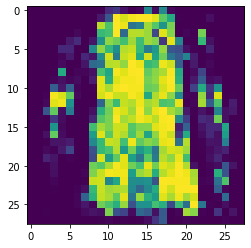

Epoch: 960 , Generator Loss: 0.693676233291626 , Discriminator Loss: 1.3862946033477783
Epoch: 970 , Generator Loss: 0.772824227809906 , Discriminator Loss: 1.3989126682281494
Epoch: 980 , Generator Loss: 0.6963084936141968 , Discriminator Loss: 1.3878848552703857
Epoch: 990 , Generator Loss: 0.6983516216278076 , Discriminator Loss: 1.3831981420516968


In [ ]:
epochs = 10000
batch_size  = 100
total_batches = mnist.train.num_examples // batch_size
#training loop
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        for i in range(total_batches):
            batch = mnist.train.next_batch(batch_size)
            batch = np.reshape(batch[0],(batch_size,784)) # reshape input for Discriminator placeholder
            batch = batch * 2 - 1
            #generate noise images
            z_noise = np.random.uniform(-1,1,size=(batch_size,100))
            #train discriminator
            _, dis_epoch_loss = sess.run([discriminator_op,dis_total_loss],
                                         feed_dict={X_input:batch,Z_input:z_noise})
            #train generator
            _,gen_epoch_loss = sess.run([generator_op,gen_fake_loss],feed_dict = {Z_input:z_noise})
        if epoch % 10 ==0:
            print("Epoch: {} , Generator Loss: {} , Discriminator Loss: {}".format(epoch,gen_epoch_loss,dis_epoch_loss))

        if epoch % 50==0:
            print("Epoch: {} , Generator Loss: {} , Discriminator Loss: {}".format(epoch,gen_epoch_loss,dis_epoch_loss))
            
            #generate a image from generator
            fimage = gen_fake.eval({Z_input:z_noise})
            
            plt.imshow(fimage[0].reshape((28,28)))
            plt.show()